In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from pydlts.fsmodels import SklMultiExpFrequencyScan
from pydlts.fsplots import plot_loss_path

%matplotlib inline

Генерация исходных данных

In [2]:
rng = np.random.default_rng(12345)

In [3]:
X = np.linspace(0.5, 3.5, 10)
y = 1 + 0.5 * X + rng.normal(loc=0, scale=0.5, size=X.shape[0])

X = np.c_[X]
y = np.c_[y]

Линейная регрессия

In [4]:
lin_regr = LinearRegression()
lin_regr.fit(X, y)

X_regr = np.c_[np.linspace(0.0, 4.0, 200)]

y_pred_lin_regr = lin_regr.predict(X_regr)

print(f'Коэффициенты линейной регрессии: {float(lin_regr.intercept_), float(lin_regr.coef_)}')

Коэффициенты линейной регрессии: (0.9150415401777493, 0.43205762091456695)


Полиномиальная регрессия

In [5]:
n = 10
poly_regr = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=n, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear_regresstion', LinearRegression()),
])
poly_regr.fit(X, y)

y_pred_poly_regr = poly_regr.predict(X_regr)

In [6]:
# from numpy.polynomial import Polynomial

# p_fitted = Polynomial.fit(X.flatten(), y.flatten(), deg=10)
# y_pred_poly_regr = p_fitted(X_regr)

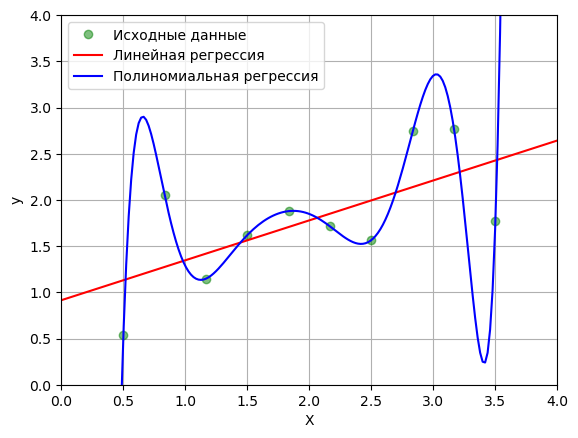

In [7]:
plt.plot(X, y, 'og', alpha = 0.5, label='Исходные данные')
plt.plot(X_regr, y_pred_lin_regr, '-r', label='Линейная регрессия')
plt.plot(X_regr, y_pred_poly_regr, '-b', label='Полиномиальная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.grid()
plt.legend(loc='upper left')

plt.savefig('../images/overfitting_polynomial.pdf', bbox_inches='tight')

plt.show()

RMSE для линейной регрессии

In [8]:
mean_squared_error(y, lin_regr.predict(X), squared=False)

0.4774914653110114

RMSE для полиномиальной регрессии

In [9]:
mean_squared_error(y, poly_regr.predict(X), squared=False)
# mean_squared_error(y, p_fitted(X), squared=False)

4.241976544502724e-11

Применение модели многоэкспоненциального частотного скана

In [10]:
fs = SklMultiExpFrequencyScan(n_exps=10, stop_val=10**-5, verbose=True)

fs.fit(X, y)

2022-10-14 14:56:39.245239: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-10-14 14:56:39.245275: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-MS-7C80
2022-10-14 14:56:39.245295: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-MS-7C80
2022-10-14 14:56:39.245368: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.76.0
2022-10-14 14:56:39.245381: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-10-14 14:56:39.245385: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.65.1 does not match DSO version 515.76.0 -- cannot find working devices in this configuration
2022-10-14 14:56:39.245744: I tensorflow/core/platform/cpu_feature_guard.cc:193] T

iteration # 0
loss: 5.392291573977621
exps_params:
[[-2.49239744 -0.02302374]
 [-3.39828343  0.04312247]
 [-1.49673915  0.03357258]
 [-2.45907493 -0.007347  ]
 [-2.06694958 -0.03375211]
 [-2.58751891  0.00712106]
 [-3.03617941  0.02804743]
 [-2.39152794  0.06743543]
 [-2.96140463 -0.00583071]
 [-1.84128967  0.03853139]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 1
loss: 2.912967721669882
exps_params:
[[-2.49181843  0.11735077]
 [-3.3942926   0.18580214]
 [-1.49870447  0.14991477]
 [-2.4588862   0.13246333]
 [-2.06566617  0.09809985]
 [-2.5876914   0.14907684]
 [-3.0363198   0.17662815]
 [-2.39336009  0.20606935]
 [-2.96132501  0.14201466]
 [-1.84285923  0.16469873]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 2
loss: 1.9116056798960996
exps_params:
[[-2.49466698  0.19858196]
 [-3.38999617  0.29158663]
 [-1.49874512  0.23217

iteration # 19
loss: 0.18955551968803547
exps_params:
[[-2.51739006  0.2671032 ]
 [-3.57327259  0.83891663]
 [-1.24762659  0.68394901]
 [-2.46375727  0.28083362]
 [-1.90630916  0.33357831]
 [-2.71456164  0.31962073]
 [-3.48589135  0.70696146]
 [-2.35145093  0.35767128]
 [-3.41424353  0.61104   ]
 [-1.47821264  0.54119534]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 20
loss: 0.18142357844817783
exps_params:
[[-2.51609702  0.26598205]
 [-3.57261492  0.84741272]
 [-1.24322577  0.69314991]
 [-2.46201987  0.279899  ]
 [-1.90300489  0.33498948]
 [-2.71618137  0.31843672]
 [-3.49095303  0.71522216]
 [-2.34886741  0.35721956]
 [-3.42260442  0.61879202]
 [-1.4651236   0.54804123]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 21
loss: 0.17497558240250366
exps_params:
[[-2.51468331  0.2648894 ]
 [-3.57159089  0.85491862]
 [-1.23964119 

iteration # 38
loss: 0.1467899477526105
exps_params:
[[-2.48308456  0.25068415]
 [-3.54083199  0.90946667]
 [-1.23723949  0.75724205]
 [-2.42760519  0.26903377]
 [-1.90266095  0.33273868]
 [-2.70773516  0.2905172 ]
 [-3.50910478  0.77699483]
 [-2.31699013  0.35422944]
 [-3.47602389  0.67841116]
 [-1.35191352  0.59980521]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 39
loss: 0.14636755911686206
exps_params:
[[-2.48116171  0.25010907]
 [-3.53917811  0.91078863]
 [-1.23835872  0.75825641]
 [-2.42580321  0.26870912]
 [-1.90426414  0.3319292 ]
 [-2.70628665  0.28892784]
 [-3.50886892  0.7783343 ]
 [-2.31583134  0.35425821]
 [-3.47694446  0.67973634]
 [-1.34908197  0.60070289]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 40
loss: 0.14597007803806317
exps_params:
[[-2.4792528   0.24955959]
 [-3.53757196  0.91203015]
 [-1.239496    

iteration # 57
loss: 0.14116425586861298
exps_params:
[[-2.44958841  0.24325802]
 [-3.51689791  0.92628478]
 [-1.25712963  0.76772447]
 [-2.39768046  0.26581143]
 [-1.94056752  0.31578431]
 [-2.67631122  0.26300489]
 [-3.5032198   0.79401679]
 [-2.30149364  0.35621472]
 [-3.4858311   0.69533812]
 [-1.31608653  0.60934223]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 58
loss: 0.14094747466137209
exps_params:
[[-2.44801917  0.24301982]
 [-3.51600665  0.92689408]
 [-1.25796449  0.76805046]
 [-2.39634599  0.26576008]
 [-1.94278915  0.31488834]
 [-2.67455668  0.2617137 ]
 [-3.50291136  0.79463116]
 [-2.30096942  0.35636259]
 [-3.4860802   0.69595181]
 [-1.31487707  0.60965189]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 59
loss: 0.14073543252062973
exps_params:
[[-2.44646918  0.24279207]
 [-3.51514386  0.92748808]
 [-1.2587751  

iteration # 76
loss: 0.1376980182984439
exps_params:
[[-2.42287663  0.24010685]
 [-3.50392565  0.9358227 ]
 [-1.26938758  0.77338864]
 [-2.37572292  0.26567823]
 [-1.98346072  0.29977894]
 [-2.64322121  0.24072926]
 [-3.49798089  0.80360983]
 [-2.29454457  0.35899126]
 [-3.48853622  0.70493124]
 [-1.29928146  0.61484313]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 77
loss: 0.13754615575234827
exps_params:
[[-2.42163896  0.24000029]
 [-3.50342531  0.93623151]
 [-1.26985943  0.77367469]
 [-2.37474506  0.26570227]
 [-1.98571791  0.29900443]
 [-2.64151778  0.23967669]
 [-3.4977403   0.80401999]
 [-2.29431981  0.35912633]
 [-3.48859152  0.70534175]
 [-1.29868791  0.61512591]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 78
loss: 0.13739674777543623
exps_params:
[[-2.42041661  0.23989792]
 [-3.50293884  0.93663295]
 [-1.27031787  

iteration # 95
loss: 0.1351839576745743
exps_params:
[[-2.40178365  0.23866217]
 [-3.49639501  0.94248056]
 [-1.27646587  0.77872507]
 [-2.35956898  0.26632884]
 [-2.02548055  0.28633737]
 [-2.61193782  0.22246594]
 [-3.49393585  0.81028249]
 [-2.29185507  0.36126612]
 [-3.48878096  0.71161041]
 [-1.29130764  0.62015168]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 96
loss: 0.1350707775994895
exps_params:
[[-2.400803    0.238613  ]
 [-3.49609268  0.94277426]
 [-1.27675037  0.7789974 ]
 [-2.3588456   0.26636992]
 [-2.02762489  0.28570515]
 [-2.61036033  0.22159934]
 [-3.49375168  0.81057655]
 [-2.29178926  0.36136931]
 [-3.48875938  0.71190477]
 [-1.29104538  0.62042375]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 97
loss: 0.1349592820650415
exps_params:
[[-2.39983404  0.23856592]
 [-3.49579781  0.94306303]
 [-1.27702808  0.

iteration # 114
loss: 0.1332986754716723
exps_params:
[[-2.38499901  0.23803325]
 [-3.49174252  0.94729652]
 [-1.28089325  0.78364574]
 [-2.34756115  0.26714697]
 [-2.06465503  0.27558936]
 [-2.58323715  0.20742238]
 [-3.49086511  0.81510231]
 [-2.29146939  0.3629939 ]
 [-3.48808263  0.71643455]
 [-1.28806227  0.62507335]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 115
loss: 0.13321361193293169
exps_params:
[[-2.38421444  0.23801514]
 [-3.49155114  0.94750989]
 [-1.28107914  0.78388729]
 [-2.34702024  0.26719121]
 [-2.06661656  0.27509575]
 [-2.58180152  0.20670878]
 [-3.49072682  0.81531576]
 [-2.29149027  0.36307297]
 [-3.48803477  0.71664816]
 [-1.28797209  0.62531511]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 116
loss: 0.13312983089658384
exps_params:
[[-2.3834388   0.23799827]
 [-3.49136415  0.9477197 ]
 [-1.2812612

iteration # 133
loss: 0.131885809989561
exps_params:
[[-2.37150946  0.23787363]
 [-3.48875824  0.95079571]
 [-1.28386027  0.78787975]
 [-2.33853943  0.26798834]
 [-2.10001094  0.2673504 ]
 [-2.5572229   0.19504483]
 [-3.48857906  0.81860231]
 [-2.29231917  0.36434598]
 [-3.48711693  0.71993669]
 [-1.28718332  0.62931106]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 134
loss: 0.1318223498685551
exps_params:
[[-2.37087558  0.23787443]
 [-3.48863367  0.95095065]
 [-1.2839882   0.78808103]
 [-2.3381307   0.26803235]
 [-2.10175672  0.26697999]
 [-2.55592625  0.19445823]
 [-3.4884771   0.81875727]
 [-2.29238475  0.36440959]
 [-3.48706524  0.72009172]
 [-1.28717439  0.6295125 ]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 135
loss: 0.13175987627565408
exps_params:
[[-2.37024863  0.23787601]
 [-3.48851182  0.95110299]
 [-1.28411376 

iteration # 152
loss: 0.13083576913172354
exps_params:
[[-2.36056696  0.23800244]
 [-3.48679861  0.95333505]
 [-1.28592996  0.79133249]
 [-2.33169146  0.26881209]
 [-2.13117333  0.26126409]
 [-2.53376703  0.18487476]
 [-3.48690386  0.82114169]
 [-2.29377015  0.3654575 ]
 [-3.48617289  0.72247699]
 [-1.28736424  0.63276589]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 153
loss: 0.1307887989629906
exps_params:
[[-2.36005043  0.23801481]
 [-3.48671596  0.95344743]
 [-1.28602039  0.79149295]
 [-2.33137954  0.26885452]
 [-2.13269667  0.26099542]
 [-2.53259952  0.18439293]
 [-3.48682961  0.82125406]
 [-2.29385512  0.365511  ]
 [-3.48612628  0.7225894 ]
 [-1.28738846  0.63292643]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 154
loss: 0.13074257352769814
exps_params:
[[-2.35953933  0.23802763]
 [-3.48663504  0.95355792]
 [-1.2861092

iteration # 171
loss: 0.13006019274699862
exps_params:
[[-2.35162032  0.23830279]
 [-3.48548874  0.95517742]
 [-1.2874018   0.79404525]
 [-2.32644368  0.26959685]
 [-2.15818255  0.25690752]
 [-2.51265758  0.1765201 ]
 [-3.4856876   0.82298395]
 [-2.29544238  0.36640534]
 [-3.48535534  0.72431961]
 [-1.28793538  0.63547948]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 172
loss: 0.13002555883103806
exps_params:
[[-2.35119645  0.2383217 ]
 [-3.48543297  0.95525904]
 [-1.28746647  0.7941694 ]
 [-2.32620349  0.26963675]
 [-2.15949381  0.2567182 ]
 [-2.51160714  0.17612415]
 [-3.48563383  0.82306555]
 [-2.29553184  0.36645155]
 [-3.48531643  0.72440122]
 [-1.28796922  0.63560366]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 173
loss: 0.12999147650084467
exps_params:
[[-2.35077689  0.23834084]
 [-3.48537833  0.9553393 ]
 [-1.287530

iteration # 190
loss: 0.12948835722240953
exps_params:
[[-2.34425935  0.23869425]
 [-3.48459815  0.9565178 ]
 [-1.28845666  0.79612408]
 [-2.32238806  0.2703272 ]
 [-2.18132859  0.25387286]
 [-2.49366148  0.16965126]
 [-3.48480691  0.82432421]
 [-2.29711769  0.36722885]
 [-3.48468609  0.72565999]
 [-1.28858089  0.63755854]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 191
loss: 0.12946280585782904
exps_params:
[[-2.34390962  0.23871625]
 [-3.48455985  0.95657734]
 [-1.28850308  0.79621825]
 [-2.32220167  0.27036392]
 [-2.18244728  0.25374283]
 [-2.49271588  0.16932551]
 [-3.48476794  0.82438375]
 [-2.29720344  0.36726919]
 [-3.48465483  0.72571953]
 [-1.2886139   0.63765272]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 192
loss: 0.12943765820482978
exps_params:
[[-2.34356337  0.23873834]
 [-3.48452228  0.95663591]
 [-1.288548

iteration # 209
loss: 0.12906586244905985
exps_params:
[[-2.33817451  0.23912245]
 [-3.4839812   0.95749885]
 [-1.28921394  0.79769068]
 [-2.31923221  0.27099319]
 [-2.20102032  0.25181111]
 [-2.47655294  0.16399677]
 [-3.48416717  0.82530519]
 [-2.29868189  0.36794849]
 [-3.48415334  0.72664099]
 [-1.28916811  0.63912516]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 210
loss: 0.12904694094524255
exps_params:
[[-2.33788485  0.23914527]
 [-3.48395436  0.95754263]
 [-1.28924725  0.79776115]
 [-2.31908674  0.27102635]
 [-2.20196943  0.25172398]
 [-2.47570076  0.16372842]
 [-3.48413876  0.82534897]
 [-2.29875999  0.36798374]
 [-3.48412866  0.72668477]
 [-1.28919634  0.63919563]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 211
loss: 0.12902831349350793
exps_params:
[[-2.33759802  0.23916809]
 [-3.48392801  0.95758571]
 [-1.289279

iteration # 228
loss: 0.1287522161855267
exps_params:
[[-2.3331286   0.23955235]
 [-3.48354464  0.95822337]
 [-1.28975637  0.79885752]
 [-2.31676479  0.27159021]
 [-2.21769961  0.25044531]
 [-2.46112534  0.15933578]
 [-3.48369866  0.82602967]
 [-2.30008533  0.36857658]
 [-3.48373458  0.72736547]
 [-1.28965324  0.64029197]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 229
loss: 0.12873812259618106
exps_params:
[[-2.3328881   0.23957457]
 [-3.48352541  0.9582559 ]
 [-1.28978016  0.79890973]
 [-2.31665086  0.27161971]
 [-2.21850225  0.25038847]
 [-2.46035633  0.15911443]
 [-3.48367773  0.82606219]
 [-2.3001544   0.36860729]
 [-3.48371525  0.72739799]
 [-1.28967578  0.64034418]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 230
loss: 0.12872424324129678
exps_params:
[[-2.33264994  0.23959673]
 [-3.48350651  0.95828792]
 [-1.2898035

iteration # 247
loss: 0.12851787855077176
exps_params:
[[-2.32893666  0.23996271]
 [-3.4832284   0.95876456]
 [-1.29014259  0.79971874]
 [-2.31483111  0.2721181 ]
 [-2.23179283  0.24956635]
 [-2.44719477  0.1554894 ]
 [-3.48335135  0.82657084]
 [-2.30131601  0.36912246]
 [-3.48340659  0.72790662]
 [-1.29003243  0.64115316]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 248
loss: 0.128507307290739
exps_params:
[[-2.32873676  0.23998351]
 [-3.48321428  0.95878903]
 [-1.29015945  0.7997571 ]
 [-2.3147418   0.27214401]
 [-2.23247049  0.24953046]
 [-2.44649989  0.15530664]
 [-3.48333571  0.8265953 ]
 [-2.30137609  0.36914907]
 [-3.48339144  0.72793108]
 [-1.29004964  0.64119152]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 249
loss: 0.12849689267507264
exps_params:
[[-2.3285388   0.24000422]
 [-3.48320037  0.95881314]
 [-1.290176  

SklMultiExpFrequencyScan(n_exps=10, stop_val=1e-05, verbose=True)

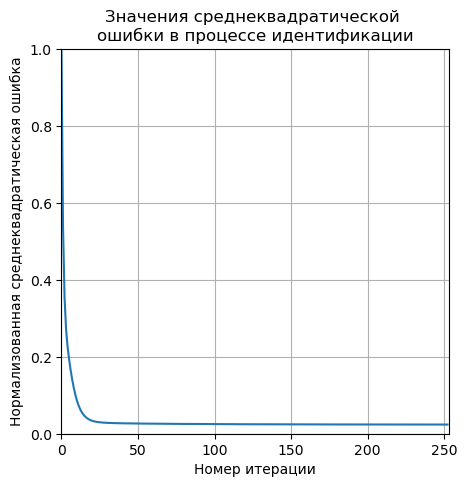

In [11]:
plot_loss_path(fs.fit_results_)

plt.show()

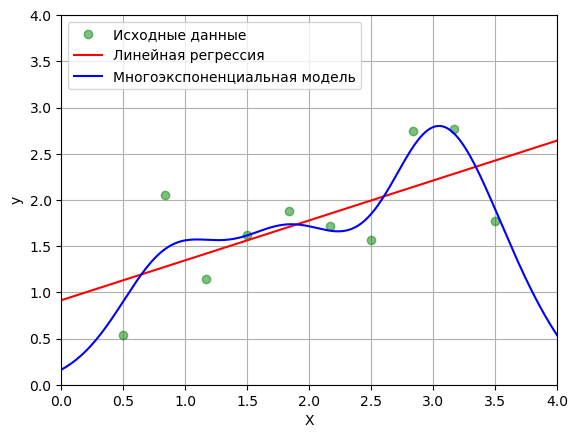

In [12]:
plt.plot(X, y, 'og', alpha = 0.5, label='Исходные данные')
plt.plot(X_regr, y_pred_lin_regr, '-r', label='Линейная регрессия')
plt.plot(X_regr, fs.predict(X_regr), '-b', label='Многоэкспоненциальная модель')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.grid()
plt.legend(loc='upper left')

# plt.savefig('../images/overfitting_multiexp.pdf', bbox_inches='tight')

plt.show()

RMSE для модели многоэкспоненциального частотного скана

In [13]:
mean_squared_error(y, fs.predict(X), squared=False)

0.28303713873536845